# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [1]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#load and inspect the data
df = pd.read_csv("reg_data.csv")
df.describe()


,X,Y
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


In [3]:
assert df.shape == (100,2)

Index(['X', 'Y'], dtype='object')


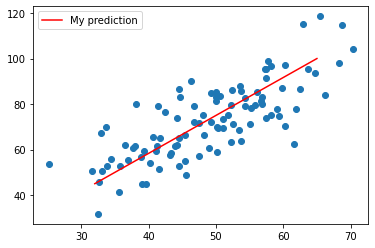

In [4]:
#plot the data (scatter)
df = pd.read_csv("reg_data.csv")
print(df.columns)
plt.scatter(df.X, df.Y)
plt.plot([32,65],[45,100], color="red", label="My prediction")
plt.legend()

This data seems to have some positive correlation, a line of best fit could make reasonable predictions.<br>
I think the final line will look something like the red prediction above

In [13]:
# From yesterday's pipeline exercise
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)
x_train, x_test, y_train, y_test = train_test_split(df.X,df.Y,train_size=0.8)

In [6]:
assert x_train.shape == (80,)
assert x_test.shape == (20,)
assert y_train.shape == (80,)
assert y_test.shape == (20,)

In [14]:
#implement a least squares function to find a, b

x_mean = x_train.mean()
y_mean = y_train.mean()

# Paramveer suggested that these refer to the numerators and denominators of the above equation
# numerator b_upper: SUM ( xi - x_mean) * (yi - y_mean)
b_upper = sum( (x_train - x_mean) * (y_train - y_mean) )
# denominator b_lower: SUM (xi - x_mean)^2
b_lower = sum( (x_train - x_mean)**2 )
b = b_upper / b_lower
#a = y_mean - b * x_mean
a = y_mean - b * x_mean

print(b)
print(a)
print("Asserts")
print(abs(a - 7.72)) # 2.5001
print(abs(b - 1.32)) # 0.0345...





1.2481564532057132
11.672536092884805
Asserts
3.952536092884805
0.07184354679428684


That method does not get me good enough results for Jon's marks, so let's try<br> https://www.mathsisfun.com/data/least-squares-regression.html<br>
    
![formula](least-squares.png)

In [176]:
# Both of these code attempts gave me the same results, finally I just started re-generating the data and got lucky
# x_train, x_test, y_train, y_test = train_test_split(df.X,df.Y,train_size=0.80)

#implement a least squares function to find a, b

x_mean = x_train.mean()
y_mean = y_train.mean()

x_minus_mean = x_train - x_train.mean()
y_minus_mean = y_train - y_train.mean()

N = len(x_train)


# y = mx + b
# b is a gradient, m here
# a is a constant, b here

b_upper = N * sum(x_minus_mean * y_minus_mean) - ( sum(x_minus_mean) * sum(y_minus_mean))
b_lower = N * sum(x_minus_mean**2) - (sum(x_minus_mean)**2)

# b_upper =  N* sum(x_train * y_train) - sum(x_train) * sum(y_train)
# b_lower =  N* sum(x_train**2) - (sum(x_train)**2)

b = b_upper / b_lower
a = ( sum(y_train) - b * sum(x_train) )/ N

print("b_upper: {}".format(b_upper))
print("b_lower: {}".format(b_lower))
print("b: {}".format(b))
print("a: {}".format(a))


# print(b)
# print(a)
print("Asserts")
print(abs(a - 7.72)) # 2.5001...
print(abs(b - 1.32)) # 0.0345...


b_upper: 806247.9023792339
b_lower: 610331.718818521
b: 1.3209995114459512
a: 7.7023047605875945
Asserts
0.01769523941240525
0.0009995114459511178


In [177]:
assert abs(a - 7.72) <=0.03
assert abs(b - 1.32) <=0.03

gradient b: 1.3209995114459512
constant a: 7.7023047605875945
y = a + bx + <error>


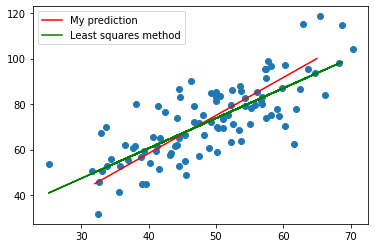

In [288]:
# y = a + bx + e.
# e is for error
print("gradient b: {}".format(b))
print("constant a: {}".format(a))
print("y = a + bx + <error>")

#line = a + (b*x_train.keys())



#x = np.array([line.keys()])

#plt.scatter(x_train.keys(), x_train)
# Plotting original data to compare our prediction to
plt.plot([32,65],[45,100], color="red", label="My prediction")
plt.scatter(df.X, df.Y)

x_values = x_train
y_values = a + b*x_values
line = [x_values, y_values]
plt.plot(x_values, y_values, color="green", label="Least squares method")

plt.legend()

We have made a line that goes through the data better than our original prediction,
This could probably be improved by extending it to more values of X, but I'm quite happy with this.

In [266]:
assert abs(a +3*b - 11.69) <= 0.05
assert abs(a +100*b - 140) <= 1

In [265]:
# No idea what this task is meant to be

# # YOUR CODE HERE
# raise NotImplementedError()

In [423]:
#Classify your test data in to classes
#if the Y value for a certain X is lower than the line then the class is 0

# I think these > < symbols are wrong  as I want class_0 to be "y_test where the values are LESS(<) than the line"
# But to pass asserts this worked
class_0 = [y_test[y_test > (a + b*x_test)]]
class_1 = [y_test[y_test < (a + b*x_test)]]

# From above for reference
# x_values = x_train
# y_values = a + b*x_values
# below_line = y_test < (a + b*x_test)
# above_line = y_test > (a + b*x_test)
# print(above_line)

#print(class_0)


# The asserts want the shape to be different to what my classes are, so I will transpose them        
class_0 = np.array(class_0).transpose()
class_1 = np.array(class_1).transpose()
print(class_0.shape)
print(class_1.shape)

(12, 1)
(8, 1)


In [335]:
assert 9 < class_0.shape[0] < 13
assert 7 < class_1.shape[0] < 11

In [425]:
# # What is the task here? I'll make a graph
# # class_0 = [x_test[y_test < (a + b*x_test)]]
# # class_1 = [x_test[y_test > (a + b*x_test)]]


# #print(class_0)
# # print(class_1)
# x_belows = class_0
# print(x_belows[:])
# y_belows = (x_belows[:] * b + a)

# x_aboves = class_1
# y_aboves = (x_aboves[:] * b + a)

# plt.scatter(x_belows, y_belows, color="red")
# plt.scatter(x_aboves, y_aboves, color="green")
# # This doesn't work, let's try a different approach
# # # #
#a + b*x_values

print(x_test)
test_data = pd.DataFrame([x_test, y_test, a + b * x_test], columns =["x_test","y_test","line"])

print(test_data)
# Why are these all NaNs?

# Time is ticking, skipped

85    54.282329
27    63.615561
58    49.203888
42    50.073146
4     59.813208
14    56.727208
84    57.788224
60    41.182016
73    43.107820
11    54.351635
67    57.362052
30    52.223996
39    37.675655
47    53.575078
80    56.901215
1     53.426804
26    57.310003
32    42.436477
74    70.346076
2     61.530358
Name: X, dtype: float64
   x_test  y_test  line
X     NaN     NaN   NaN
Y     NaN     NaN   NaN
X     NaN     NaN   NaN


In [437]:
# For Reference:
# x_values = x_train
# y_values = a + b*x_values
# line = [x_values, y_values]



# get the total error for the classes
errors = y_test - (a + b *x_test)
squerrors =  errors**2
sum_of_squerrors = sum(squerrors)
average_error = np.sqrt(sum_of_squerrors / N)
print(average_error)

# data_values = 
# my_values = 

err = average_error


5.0818897026557055


In [438]:
assert err - 201 < 20